<a href="https://colab.research.google.com/github/Praveenverma296/datascience/blob/main/ds_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #8 Demonstrate Estimation Model Evaluation Using R/Python
 Demonstrate Stepwise Regression Using R/Python

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate some random data for demonstration
np.random.seed(42)
X = np.random.rand(100, 1) * 10
Y = 3 * X + np.random.randn(100, 1) * 2

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.6801412165451053
R-squared: 0.9501425422637257


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming you have a dataframe df with dependent variable 'Y' and independent variables 'X1', 'X2', ...
# Generate some random data for demonstration
np.random.seed(42)
df = pd.DataFrame({'Y': 3 * X.flatten() + np.random.randn(100) * 2, 'X1': X.flatten(), 'X2': np.random.randn(100)})

# Function for stepwise regression
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval}')
        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        if not changed:
            break
    return included

# Separate target variable and features
y = df['Y']
X = df.drop('Y', axis=1)

# Perform stepwise regression
selected_features = stepwise_selection(X, y)

print("Selected features:", selected_features)


Add  X1 with p-value 7.030235624093543e-72
Selected features: ['X1']


<ipython-input-2-f3a8c0629358>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-2-f3a8c0629358>:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


# 10 DIMENSION REDUCTION DIMENSION REDUCTION

 Demonstrate How you will  Identify Multicollinearity R/Python
 Demonstrate HOW you’ll apply PRINCIPAL COMPONENTS ANALYSIS Using R/Python

In [ ]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

#view DataFrame
print(df)

   rating  points  assists  rebounds
0      90      25        5        11
1      85      20        7         8
2      82      14        7        10
3      88      16        8         6
4      94      27        5         6
5      90      20        7         9
6      76      12        6         6
7      75      15        9        10
8      87      14        9        10
9      86      19        5         7


In [ ]:
#variance_inflation_factor() function from the statsmodels library:

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for regression model using 'rating' as response variable
y, X = dmatrices('rating ~ points+assists+rebounds', data=df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable
print(vif_df)

    variable         VIF
0  Intercept  101.258171
1     points    1.763977
2    assists    1.959104
3   rebounds    1.175030


Demonstrate HOW you’ll apply PRINCIPAL COMPONENTS ANALYSIS Using R/**Python** **bold text**

In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# importing or loading the dataset
dataset = pd.read_csv('/content/Wine.csv')

# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values


In [ ]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)


In [ ]:
# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


<ipython-input-61-4a442d8e42f2>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


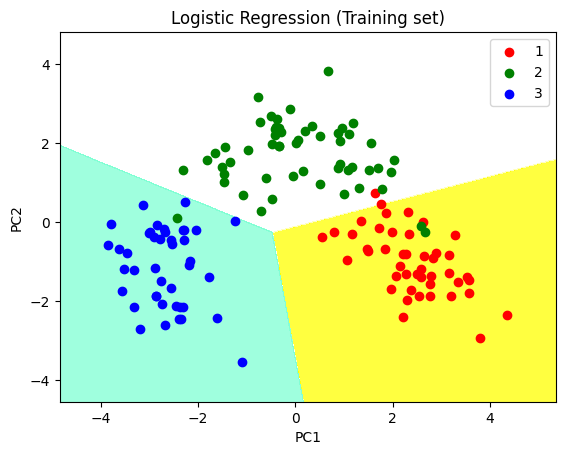

In [ ]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()


<ipython-input-21-82de56e1ae52>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


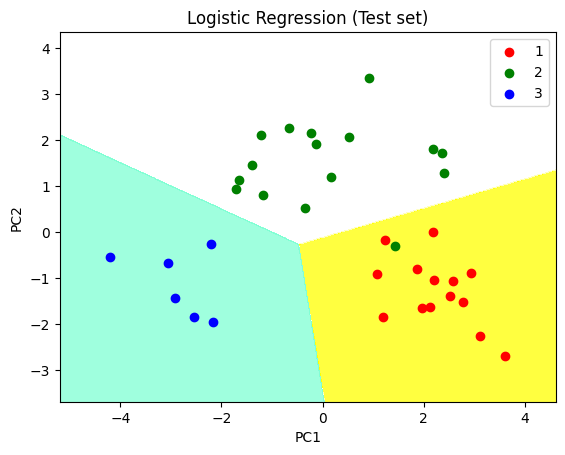

In [ ]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()


#11: LOGISTIC REGRESSION MODELLING

 How to Perform Logistic Regression Using R/Python
 How to Perform Poisson Regression Using R/Python

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [ ]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y_binary, test_size=0.2, random_state=42)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 73.03%


In [ ]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



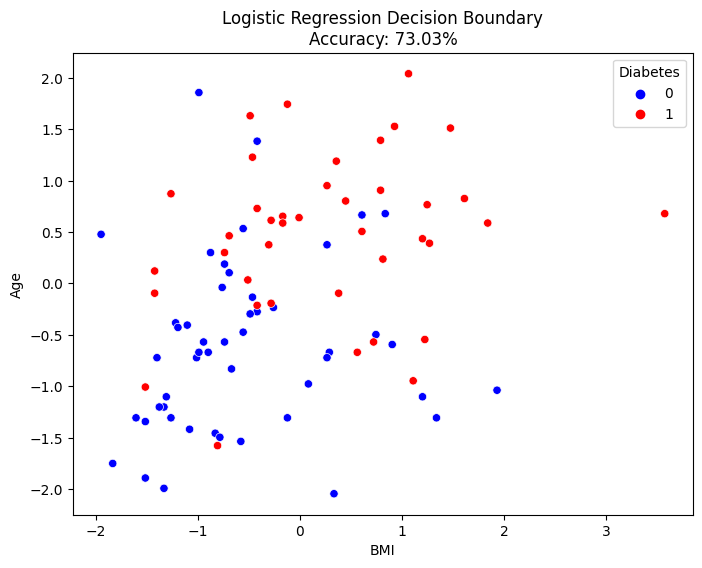

In [ ]:
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
				0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()


**how to perform poisson regression using python**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
df = pd.read_csv(r"/content/competition_awards_data.csv",  sep = ',', header= 0 )
df.head()

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


In [ ]:
# number of observations: 200
df.shape
# checking NA
# there are no missing values in the dataset
df.isnull().values.any()

False

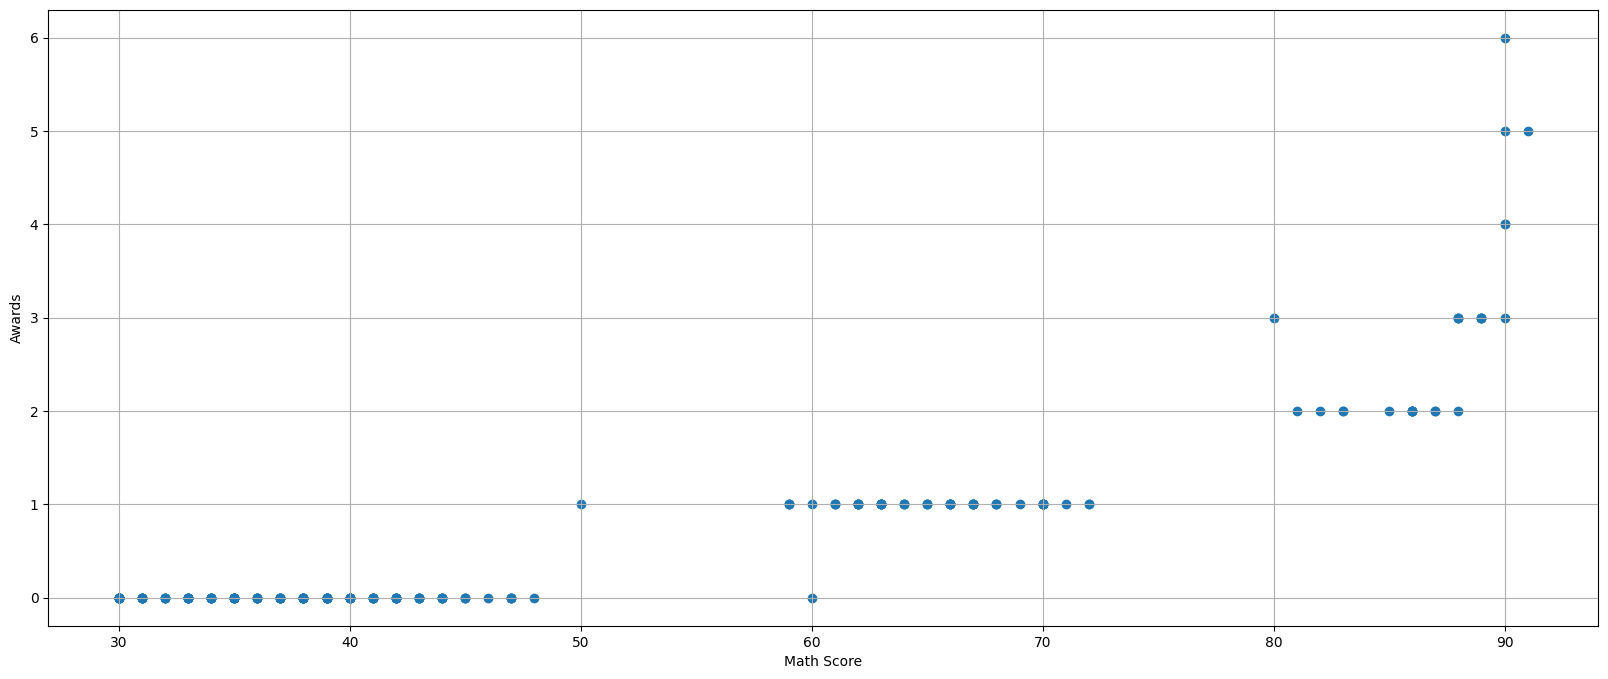

In [ ]:
# plotting awards agains Math score
fig, ax = plt.subplots(figsize=(20,8))
plt.grid()
ax.set_ylabel("Awards")
ax.set_xlabel("Math Score")
ax.scatter( df['Math Score'],df.Awards)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df, train_size = .8,random_state =1)
print(len(train))

160


In [ ]:
print(len(test))

40


In [ ]:
# defining X and y for model training and test
X_train = train['Math Score'].values.reshape(-1, 1)
y_train = train.Awards

X_train.shape,y_train.shape

((160, 1), (160,))

In [ ]:
X_test = test['Math Score'].values.reshape(-1, 1)
y_test = test.Awards
X_test.shape,y_test.shape

((40, 1), (40,))

In [ ]:
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits
# Pipeline helps you associate two models or objects to be built sequentially with each other,
# in this case, PoissonRegressor() is the only object

pipeline = Pipeline([('model', PoissonRegressor())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred)

r2_test

0.8371373661390169

In [ ]:
# training performance
y_pred_train = pipeline.predict(X_train)
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_train

0.8586107885977591

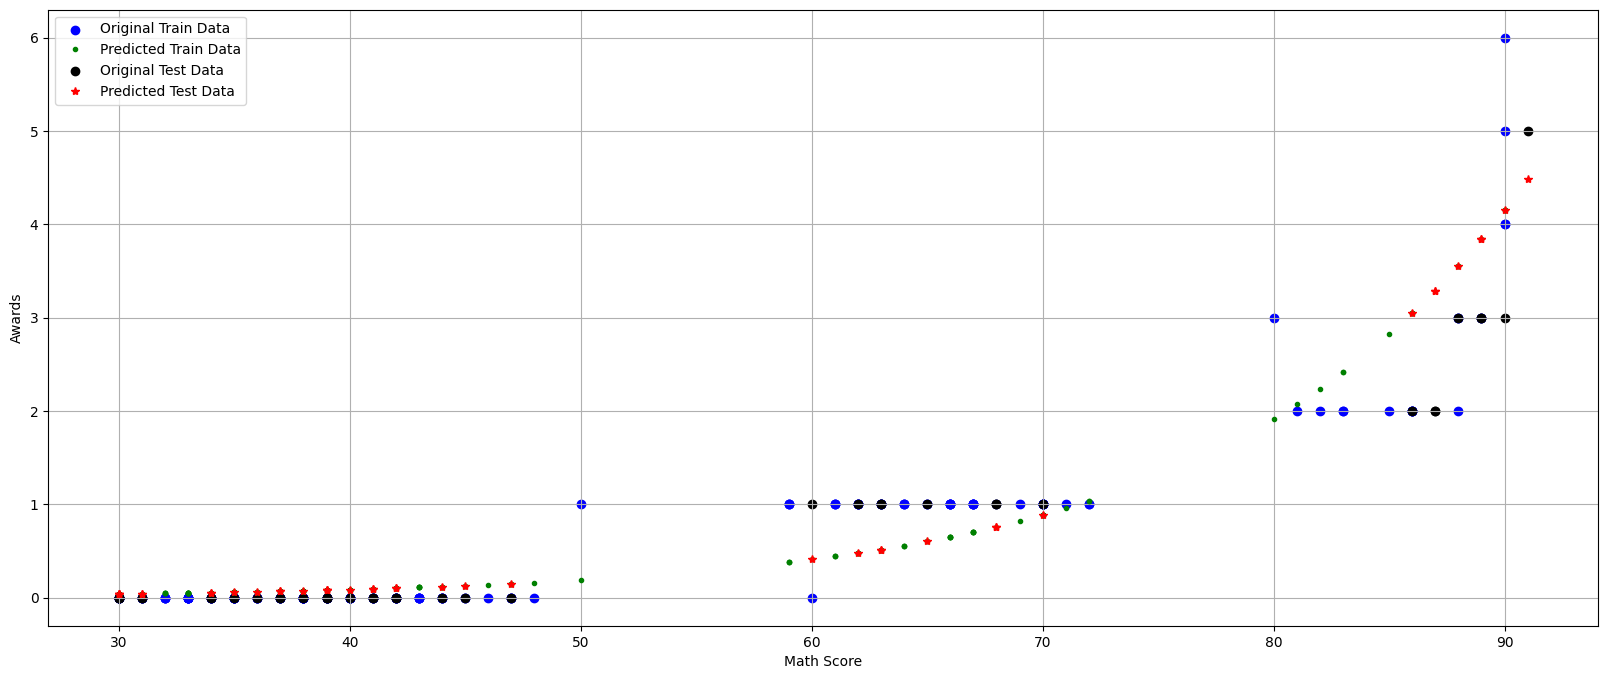

In [ ]:
# plot predictions and actual values against Math score

fig, ax = plt.subplots(figsize=(20,8))
plt.grid()
ax.set_xlabel("Math Score")
ax.set_ylabel("Awards")
# train data in blue
ax.scatter(X_train, y_train,color='blue',label="Original Train Data")
ax.plot(X_train, y_pred_train, '.', color='green',label="Predicted Train Data")
# test data
ax.scatter(X_test, y_test,color='black',label="Original Test Data")
ax.plot(X_test, y_pred, '*', color='red',label="Predicted Test Data")
ax.legend()
plt.show()

In [ ]:
eval = pd.DataFrame({'y_pred': [round(y, 0) for y in y_pred], 'y': y_test}).reset_index()
eval.head()

,index,y_pred,y
0,58,0.0,0
1,40,0.0,0
2,34,1.0,1
3,102,0.0,0
4,184,3.0,2


In [ ]:
print('     Frequency table')
eval.groupby(['y', 'y_pred']).agg('count').reset_index().pivot(index='y', columns='y_pred', values='index').fillna(0)

     Frequency table


y_pred,0.0,1.0,3.0,4.0
y,,,,
0,24.0,0.0,0.0,0.0
1,2.0,6.0,0.0,0.0
2,0.0,0.0,3.0,0.0
3,0.0,0.0,0.0,4.0
5,0.0,0.0,0.0,1.0
